In [1]:
from src.climate_analysis import load_netcdf, compute_regional_timeseries, plot_trend_with_region


ModuleNotFoundError: No module named 'src'

In [2]:
pwd

'/Users/calipfleger/climate-analysis/notebooks'

In [3]:
cd ..

/Users/calipfleger/climate-analysis


In [4]:
from src.climate_analysis import load_netcdf, compute_regional_timeseries, plot_trend_with_region


/Users/calipfleger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/calipfleger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


📅 Script started at: 2025-02-13 21:23:42


In [5]:
ds = load_netcdf("data/cesmlme_PRECTvolc.nc")


/Users/calipfleger/opt/anaconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (/Users/calipfleger/opt/anaconda3/lib/python3.9/site-packages/typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


✅ Loaded data/cesmlme_PRECTvolc.nc


In [6]:
# Check dataset info
print(ds)

<xarray.Dataset> Size: 141MB
Dimensions:                        (lat: 36, lon: 87, time: 1872, ensemble: 6)
Coordinates:
  * lat                            (lat) float64 288B -33.16 -31.26 ... 33.16
  * lon                            (lon) float64 696B 75.0 77.5 ... 287.5 290.0
  * time                           (time) object 15kB 1850-01-01 00:00:00 ......
Dimensions without coordinates: ensemble
Data variables:
    __xarray_dataarray_variable__  (ensemble, time, lat, lon) float32 141MB ...


In [10]:
# Compute regional time series
regional_ts = compute_regional_timeseries(ds, "PRECT")

KeyError: "No variable named 'PRECT'. Variables on the dataset include ['lat', 'lon', 'time', '__xarray_dataarray_variable__']"

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

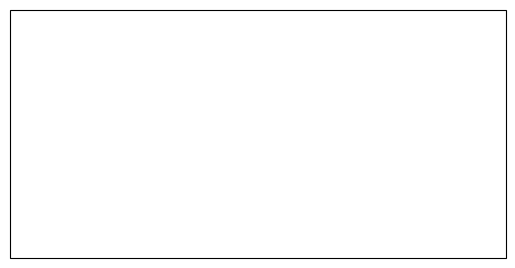

In [9]:
# Plot the linear trend with the regional analysis box
fig = plot_trend_with_region(ds, "Precipitation", ("1850", "2005", "days since 1850-01-01"))
fig.show()

📊 Automatically selected variable: __xarray_dataarray_variable__
✅ Computed regional mean time series for __xarray_dataarray_variable__


AttributeError: Rectangle.set() got an unexpected keyword argument 'cmap'

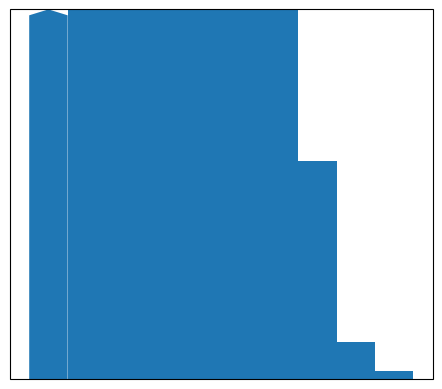

In [11]:
# Get the first available variable dynamically
variable_name = list(ds.data_vars.keys())[0]  # Get the first variable in the dataset
print(f"📊 Automatically selected variable: {variable_name}")

# Compute regional time series with the detected variable
regional_ts = compute_regional_timeseries(ds, variable_name)

# Plot trends with detected variable
fig = plot_trend_with_region(ds[variable_name], variable_name, ("1850", "2005", "days since 1850-01-01"))
fig.show()